**Lab 3: Spectral Representation**

The goal of this lab is to gain familiarity with the spectral representations of signals, specially the spectrograms.

In [1]:
import os
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

from scipy import signal
from IPython.display import Audio

from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, plot_spectrum_at

c:\Users\mazan\OneDrive\Escritorio\Lab 3 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 3 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 3 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 3 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 3 - Group 103 - u251459\util.py:223: 

First upload your reference signal and plot the first seconds of it.

In [2]:
ref, fs = load_audio("pluck.wav")

display(Audio(ref, rate=fs))               

plot_signals(ref, fs, t_start=0, t_end=2, name=["reference"])


# **Exercises**

**1. Spectrograms**

A spectrogram is obtained by estimating the frequency content in short sections of the signal. The magnitude of the spectrum over individual sections is plotted as intensity or color on a two-dimensional plot versus frequency and time. The length of each section, or window length, determines the frequency resolution. Longer windows give good frequency resolution but fail to
track frequency changes well. Shorter windows have poor frequency resolution, but good tracking.

In Python the function `spectrogram` from the `scipy.signal` package will
compute the spectrogram. A common call to the function is defined as follows. No need to understand the meaning of each parameter at this stage. Note that we provide the `plot_spectrogram` function to plot the spectrogram.

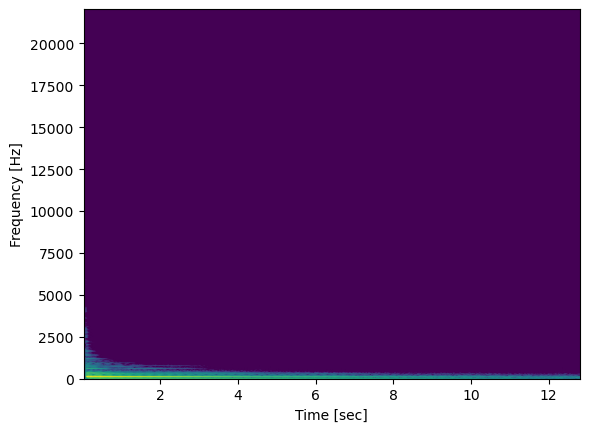

In [3]:
ff, tt, S= signal.spectrogram(ref,fs=fs, nperseg=2048, noverlap=1024)
plot_spectrogram(ff, tt,S)

We can plot the spectrum (one slice of the spectrogram) of the signal at an specific time using the `plot_spectrum_at` function. For instance, we can see the spectrum of the signal at the 0.5 seconds:

In [4]:
def plt_spectrum(z, t_start=0.763):
    from util import plot_spectrum_at
    from scipy import signal
    windows_len = 8192
    ff, tt, S = signal.spectrogram(z, 44100, nperseg=windows_len, noverlap=windows_len/2)
    plot_spectrum_at(ff, tt, S, t_start)

plt_spectrum(ref)


1.1. Calculate and plot the spectrogram of your reference signal. Use `plt.ylim` to select the limits of the y axis in order to zoom in the frequency region of interest. For instance if you want to see the region between 0 and 4000 Hz, you can call `plt.ylim([0, 4000])` after the `plot_spectrogram` function.


(0.0, 1000.0)

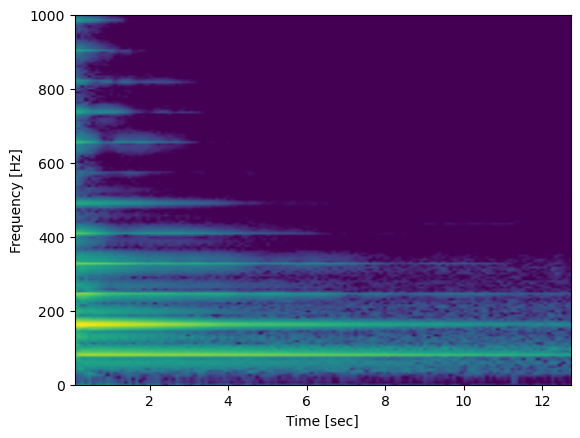

In [5]:
window_len = 8192 

# We compute the spectrogram 
ff, tt, S_ref = signal.spectrogram(ref, fs=44100, nperseg=window_len, noverlap=window_len//2)

plot_spectrogram(ff, tt, S_ref)  # We plot it

plt.ylim(0, 1000)  # zoom to 0–1 kHz (because its a low note: fundamental + few harmonics)


1.2. Select a time where almost all harmonics are present and plot the spectrum at that time.

In [6]:
plot_spectrum_at(ff, tt, S_ref, 0.25)       # We plot the spectrum

1.3. Use the cursor for measuring the weights of the fundamental frequency and some harmonics (6-10)

In [7]:
# example format (replace with your measured values)
weights = [1, 0.05361973, 0.02075456, 0.00638063, 0.005605868, 0.00289555, 0.001859109, 0.001014176, 0.001188837]


**2. Synthesis**:

Let's define a function to synthetize an harmonic singal which receives the fundamental frequency ($f_0$) and the weights ($A_k$) of each harmonic and the time vector ($t$). This is similar to what you did in Lab 3- Ex3.2.


In [8]:
def synthesize(f0, phi, Ak, t, A):
    # f0 in Hz, Ak[0] = 0  (so k=1 is the fundamental)
    y = np.zeros_like(t, dtype=float)
    for k in range(len(Ak)):
        y += Ak[k] * np.cos(2*np.pi*f0*k*t + k*phi - (k-1)*np.pi/2)
    # We match peak level to A
    y = A * y / (np.max(np.abs(y)) + 1e-12)
    return y


2.1. Use the `synthetize` function to generate a synthesis with the weights ($A_k$) found in 1.3 and the fundamental frequency and phases found in previous labs. Plot both the reference and the synthetize signal. Listen to the synthetize signal.

In [9]:
# Our wights (A1 - A9)
weights = [1, 0.05361973, 0.02075456, 0.00638063, 0.005605868, 0.00289555, 0.001859109, 0.001014176, 0.001188837]

# We put a 0 in front so A1 is used with k=1, not k=0
Ak = [0.0] + weights

# We load the reference sound and sampling rate
ref, fs = load_audio("pluck.wav")

# Synthesis settings
f0  = 86.13          # fundamental frequency in Hz
phi = 49*np.pi/72    # overall phase
A   = np.max(np.abs(ref))  # we match the peak level of the reference

# Time vector 
t = np.arange(0, len(ref)/fs, 1/fs)

# We make the synthesized signal
synth = synthesize(f0, phi, Ak, t, A)

# We plot a short zoom (arround 10 periods) to compare shapes
T = 1.0 / f0
plot_signals([ref, synth], fs, t_start=0.25, t_end=0.25 + 10*T, name=["reference", "synthesized"])



2.2. Calculate the spectrogram of the synthesized signal `S_synt`; and compare the spectrums of both signals at the same time using `plot_spectrum_at(ff, tt, [S_ref, S_synt], time)`, where `S_ref`is spectrogram of the reference signal.

**Note:** use the same window length to calculate both spectrograms.

In [12]:
windows_len = 8192

# Spectrograms
ff, tt, S_synt= signal.spectrogram(synth,44100, nperseg=windows_len, noverlap=windows_len/2)

# We compare the specturms at 0.25 s
plot_spectrum_at(ff, tt, [S_ref, S_synt], 0.25,)

2.3. Compare the spectrograms of the two signals. What are the main differences?

The orange plot is the synthesized signal and the blue plot is the reference. At the fundamental and first few harmonics they look similar, but after that the differences appear. The synthesized signal has only the harmonics we put in the weights, so they are very clean, with almost no noise and little energy above a few kHz, with all the lines fading with a similar speed because we use one common envelope. The reference one has many more harmonics and also a short noisy splash at the start (which is the attack), more energy at high frequencies, a higher noise floor and each harmonic fades at a different speed, so it looks richer and more natural. 

2.4. Listen to the two audios (reference and synthesized). What are the main differences?

In [13]:
Audio(synth, rate=fs)

In [23]:
Audio(ref, rate=fs)

The synthesized sound is clean, but more simple. It has fewer harmonics and no decay, making it sound robotic. The reference sound is richer and more natural: there is a short attack, more high harmonics that make it brighter, and different harmonics fade at different speeds, so the color and tone changes while it decays. We can also hear tiny pitch/phase wiggles and a bit of room/noise in the reference that the synth does not have. 